### Importing all the neccesary libraries at once

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

### Loading the data
Assigning the column names for the data for convenience.The names are included in the column_names list.
The Data is loaded into "dataset"

In [2]:
column_names = ['ID','Diagnosis','feature1','feature2','feature3','feature4','feature5','feature6','feature7','feature8','feature9','feature10','feature11','feature12','feature13','feature14','feature15','feature16','feature17','feature18','feature19','feature20','feature21','feature22','feature23','feature24','feature25','feature26','feature27','feature28','feature29','feature30']
dataset = pd.read_csv('wdbc.dataset',names = column_names)

In [3]:
dataset.head()

,ID,Diagnosis,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


---
The various datatypes in the data have to be checked and if there are variations present all have to be converted into a same form

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID           569 non-null int64
Diagnosis    569 non-null object
feature1     569 non-null float64
feature2     569 non-null float64
feature3     569 non-null float64
feature4     569 non-null float64
feature5     569 non-null float64
feature6     569 non-null float64
feature7     569 non-null float64
feature8     569 non-null float64
feature9     569 non-null float64
feature10    569 non-null float64
feature11    569 non-null float64
feature12    569 non-null float64
feature13    569 non-null float64
feature14    569 non-null float64
feature15    569 non-null float64
feature16    569 non-null float64
feature17    569 non-null float64
feature18    569 non-null float64
feature19    569 non-null float64
feature20    569 non-null float64
feature21    569 non-null float64
feature22    569 non-null float64
feature23    569 non-null float64
feature24    569 non-null float64
feature25    5

---
The data has to be checked if it has any undefined values

In [5]:
# dataset.isnull().sum()
dataset.isna().sum()

ID           0
Diagnosis    0
feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
dtype: int64

---
* The column named ID is not useful in making prediction hence it can be dropped
* The diagnosis values is an object type hence it has to be converted to a type compatible for comparision


In [6]:
dataset.drop(['ID'], axis = 1)
dataset['Diagnosis'] = dataset['Diagnosis'].map({'M':1,'B':0})

### Separating the data into input and the target

In [7]:
y = dataset['Diagnosis']
x = dataset.drop(['Diagnosis'],axis = 1)

### Normalization

In [8]:
norm_x = (x - np.min(x))/(np.max(x)-np.min(x)).values

### Splitting the data
* The data is split into train,test and validatoin data(80%,10%,10% respectively)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(norm_x,y,test_size = 0.2,random_state = 1)

x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size = 0.5,random_state = 1)

###

y_train = y_train.values
y_test = y_test.values
y_val = y_val.values



### Initialising the weights to 0.01

In [10]:
def initialize_weights_bias(n_features):
    w = np.zeros((1,n_features))
    b = 0.0
    return w,b

### Definition of the sigmoid function

In [11]:
def sigmoid(z):
    result = 1/(1+np.exp(-z))
    return result

### Calculation of the costs and the gradient

In [12]:
def optimise(w,b,X,Y):
    m = X.shape[0]
    result = sigmoid(np.dot(w,X.T)+b)
    Y_T = Y.T
    #calculating the cost
    cost = (-1/m)*(np.sum((Y_T*np.log(result)) + ((1-Y_T)*(np.log(1-result)))))
    
    #calculating the gradient
    dw = (1/m)*(np.dot(X.T,(result - Y.T).T))
    db = (1/m)*(np.sum(result - Y.T))
    
    values = {"dw":dw,"db":db}
    
    return values,cost

### Training and validation 
* The model is trained on the training data
* The weights get updated in each epoch
* At the end of each epoch the model is validated
* Finally, the graph is plotted loss and accuracy vs epochs

In [13]:
def model_predict(w,b,X,Y, alpha, epochs):
    costs = []
    index = []
    train_acc = []
    val_acc = []
    val_loss = []
    for i in range(epochs):
        grad, cost = optimise(w,b,X,Y)
        dw = grad["dw"]
        db = grad["db"]
        
        w = w - (alpha * (dw.T))
        b = b - (alpha * db)
        costs.append(cost)
        index.append(i)
        #calculating training accuracy
        predt = sigmoid(np.dot(w,X.T)+b)
        predClass = predict(predt,m_train)
#         print("Training loss:", cost)
#         print("Training Accuracy:", accuracy_score(predClass.T,y_train) )
        train_acc.append(accuracy_score(predClass.T,y_train))
        
        #calculating validation accuracy and loss
        predv = sigmoid(np.dot(w,x_val.T)+b)
        m = x_val.shape[0]
        Y_T = y_val.T
        loss = (-1/m)*(np.sum((Y_T*np.log(predv)) + ((1-Y_T)*(np.log(1-predv)))))
        predValClass = predict(predv,x_val.shape[0])
        val_acc.append(accuracy_score(predValClass.T,y_val))
        val_loss.append(loss)
        if (i % 50 == 0):
            print("training loss: {} Validation loss: {}".format(cost,loss))

#         print("Validation Loss:", loss)
#         print("Validation Accuracy",accuracy_score(predValClass.T,y_val))
        
        
        #calculating validation loss
#         m = x_val.shape[0]
#         Y_T = y_val
#         loss = (-1/m)*(np.sum((Y_T*np.log(predv))) + ((1-Y_T)*(np.log(1-predv))))
#         val_loss.append(loss[:][0])
# #         print(loss)
        
        
#     print("Final training loss = ",costs[-1])
       
#     print("Final validation loss = ",val_loss[-1]) 
#     print("Final validation accuracy = ",val_acc[-1])    
    coeff = {"w": w,"b":b}
    gradient = {"dw": dw, "db": db}     
    
    
    plt.plot(index,costs)
    plt.plot(index,val_loss)
#     plt.xticks(index,rotation = 'vertical')
    plt.title('Model Loss')
    plt.xlabel("Number of epochs")
    plt.ylabel("Loss")
    plt.legend(['train','val'], loc = 'upper left')
    plt.show()
    
    plt.plot(index,train_acc)
    plt.plot(index,val_acc)
    plt.title('Model Accuracy')
#     plt.xticks(index,rotation = 'vertical')
    plt.xlabel("Number of epochs")
    plt.ylabel("Accuracy")
    plt.legend(['train','Val'], loc = 'upper left')
    
    plt.show()
    
#     print("[training loss =  ",costs[-1])       
#     print("validation loss = ",val_loss[-1]) 
    print("validation accuracy = ",val_acc[-1])
 
             
    
    
    return coeff,gradient,costs

#### Since this is a two class classification problem the output has to be converted to either of one class. This is done by utilising a threshold value.

In [14]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i]> 0.5:
            y_pred[0][i] = 1
    return y_pred

training loss: 0.6931471805599453 Validation loss: 0.6893410215827553
training loss: 0.5688452981515226 Validation loss: 0.5706828468790703
training loss: 0.4880283970086455 Validation loss: 0.4986248950760241
training loss: 0.43203320402760015 Validation loss: 0.4481465526696395
training loss: 0.39118654842106176 Validation loss: 0.4109927276435283
training loss: 0.3600896435625894 Validation loss: 0.3825096535524149
training loss: 0.33558996561785837 Validation loss: 0.35994161596875685
training loss: 0.3157493342588956 Validation loss: 0.34157670615723373
training loss: 0.29931849040765174 Validation loss: 0.3263024701384527
training loss: 0.28545851711200504 Validation loss: 0.3133669415907505
training loss: 0.27358594548850884 Validation loss: 0.3022443400717694
training loss: 0.26328261803912756 Validation loss: 0.2925562276840564
training loss: 0.25424103077575666 Validation loss: 0.28402334174776633
training loss: 0.2462299564933305 Validation loss: 0.2764351055103913
training 

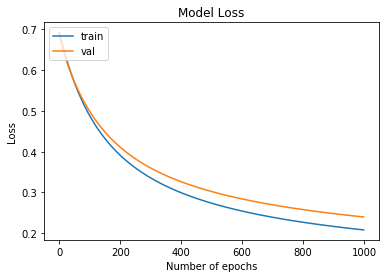

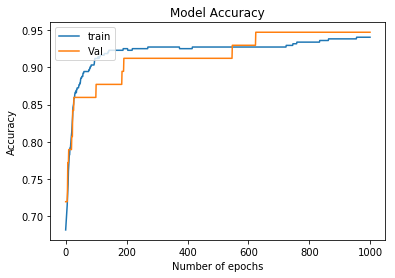

validation accuracy =  0.9473684210526315
Training accuracy:  0.9406593406593406
Test accuracy:  0.9473684210526315
Precision score:  0.8846153846153846
Recall Score: 1.0
True negatives: 31
False positives: 0
False negatives: 3
True positives: 23


In [15]:
n_features = x_train.shape[1]
# print("Number of features is :",n_features)
w,b = initialize_weights_bias(n_features)
# index = []
#Gradient Descent
m_train = x_train.shape[0]
m_test = x_test.shape[0]
coeff,gradient,costs = model_predict(w,b,x_train,y_train,0.1,1000)
w = coeff["w"]
b = coeff["b"]

final_train_prediction = sigmoid(np.dot(w,x_train.T)+b)
final_test_prediction  = sigmoid(np.dot(w,x_test.T)+b)

# m_train = x_train.shape[0]
# m_test = x_test.shape[0]

y_train_predictions = predict(final_train_prediction, m_train)
print('Training accuracy: ',accuracy_score(y_train_predictions.T,y_train))

y_test_predictions = predict(final_test_prediction, m_test)
print('Test accuracy: ',accuracy_score(y_test_predictions.T,y_test))

print('Precision score: ',precision_score(y_test_predictions.T,y_test))

print('Recall Score:',recall_score(y_test_predictions.T,y_test))


tn,fp,fn,tp  = confusion_matrix(y_test.flatten(),y_test_predictions.T,labels = None,sample_weight= None).ravel()
print('True negatives:',tn)
print('False positives:',fp)
print('False negatives:',fn)
print('True positives:',tp)